In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s


# 📊 Rapport : Analyse du jeu Heart Disease (UCI)

## Contexte
Ce projet porte sur l'analyse du jeu de données Heart Disease provenant de l'UCI.
Le dataset contient des informations médicales sur des patients, utilisées
pour prédire la présence ou l'absence de maladie cardiaque.

## Objectifs
- Comprendre les tendances générales du dataset
- Identifier les corrélations entre les variables
- Visualiser les distributions et comportements des variables
- Analyser la variable cible (présence ou absence de maladie cardiaque)

## Contenu du projet
1. Analyse descriptive : moyenne, médiane, variance, écart-type, min/max
2. Visualisations graphiques : histogrammes, boxplots, scatterplots, barplots, heatmap
3. Corrélations entre variables
4. Interprétation et conclusion

## Auteur
Douae El Fagrouch


✅ Jeu de données chargé avec succès
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  

--- Informations sur le dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 n

/tmp/ipython-input-40603168.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, data=df, palette="pastel")


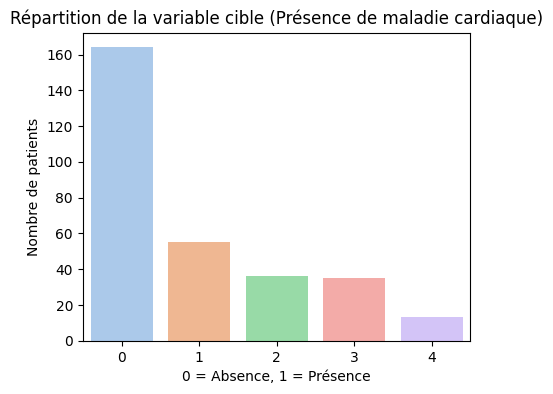

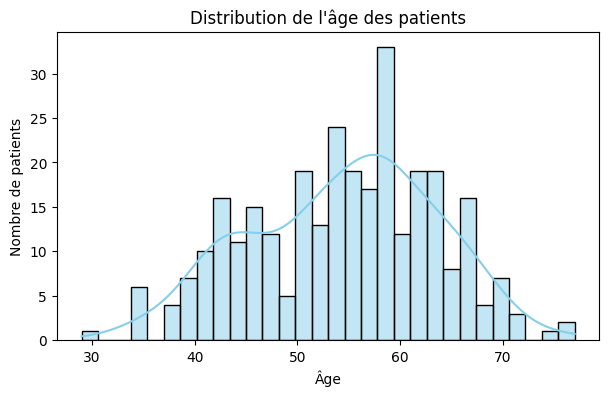

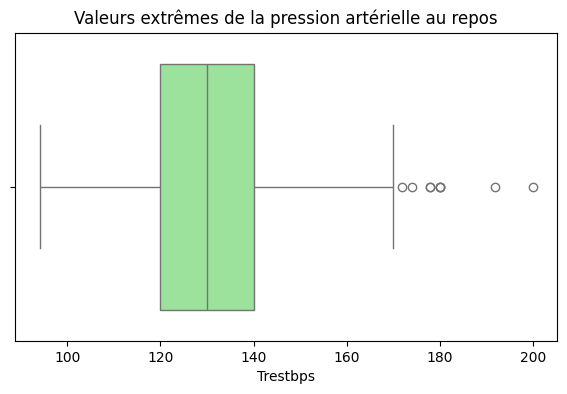

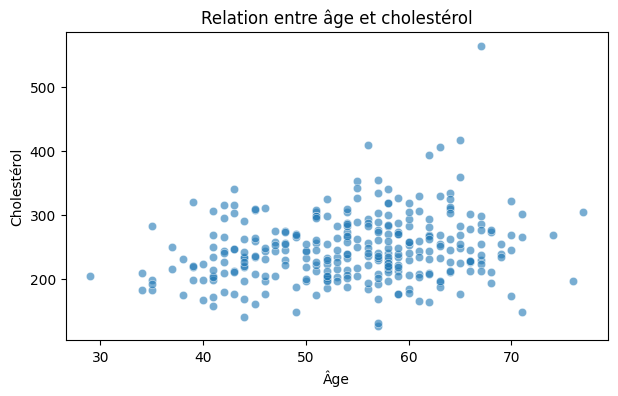

/tmp/ipython-input-40603168.py:131: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='Set2')


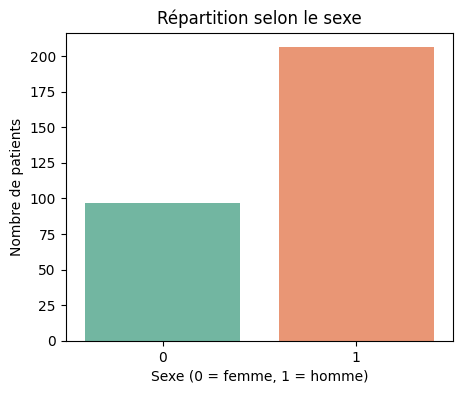

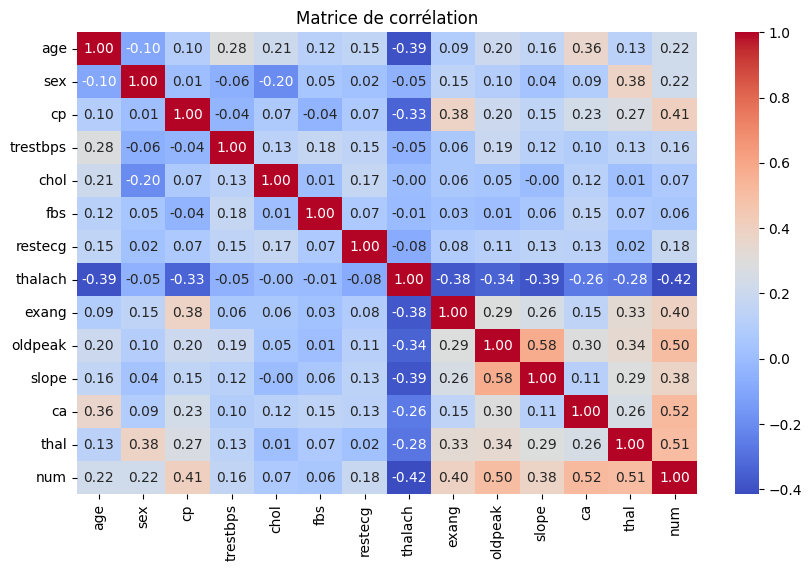


## 🧠 Conclusion rapide

- L'âge moyen des patients se situe entre 50 et 60 ans.
- La variable cible est légèrement déséquilibrée : proportion de patients avec maladie < 60%.
- Les variables 'trestbps' et 'chol' montrent quelques valeurs extrêmes.
- Les corrélations entre variables numériques sont faibles à modérées.


In [9]:
# ===============================
# 📊 PROJET : ANALYSE HEART DISEASE (UCI)
# Auteur : Douae El Fagrouch
# Date : Novembre 2025
# ===============================

# ===============================
# 1️⃣ Affichage du rapport / présentation
# ===============================
from IPython.display import display, Markdown

display(Markdown("""
# 📊 Rapport : Analyse du jeu Heart Disease (UCI)

## Contexte
Ce projet porte sur l'analyse du jeu de données Heart Disease provenant de l'UCI.
Le dataset contient des informations médicales sur des patients, utilisées
pour prédire la présence ou l'absence de maladie cardiaque.

## Objectifs
- Comprendre les tendances générales du dataset
- Identifier les corrélations entre les variables
- Visualiser les distributions et comportements des variables
- Analyser la variable cible (présence ou absence de maladie cardiaque)

## Contenu du projet
1. Analyse descriptive : moyenne, médiane, variance, écart-type, min/max
2. Visualisations graphiques : histogrammes, boxplots, scatterplots, barplots, heatmap
3. Corrélations entre variables
4. Interprétation et conclusion

## Auteur
Douae El Fagrouch
"""))

# ===============================
# 2️⃣ Import des bibliothèques
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo

# ===============================
# 3️⃣ Chargement du dataset
# ===============================
heart_disease = fetch_ucirepo(id=45)

X = heart_disease.data.features
y = heart_disease.data.targets

# Fusion des features et cible
df = pd.concat([X, y], axis=1)

print("✅ Jeu de données chargé avec succès")
print(df.head())

# ===============================
# 4️⃣ Informations générales
# ===============================
print("\n--- Informations sur le dataset ---")
print(df.info())
print("\nDimensions :", df.shape)
print("\nValeurs manquantes par colonne :")
print(df.isnull().sum())

# ===============================
# 5️⃣ Analyse descriptive des variables numériques
# ===============================
numeric_df = df.select_dtypes(include=[np.number])
print("\n--- Statistiques descriptives ---")
print(numeric_df.describe())

print("\n--- Moyenne / Médiane / Ecart-type / Variance ---")
for col in numeric_df.columns:
    print(f"\n📈 {col} :")
    print(f"  Moyenne : {numeric_df[col].mean():.2f}")
    print(f"  Médiane : {numeric_df[col].median():.2f}")
    print(f"  Variance : {numeric_df[col].var():.2f}")
    print(f"  Ecart-type : {numeric_df[col].std():.2f}")
    print(f"  Min : {numeric_df[col].min():.2f}")
    print(f"  Max : {numeric_df[col].max():.2f}")
    print(f"  Q1 : {numeric_df[col].quantile(0.25):.2f}")
    print(f"  Q2 (médiane) : {numeric_df[col].quantile(0.50):.2f}")
    print(f"  Q3 : {numeric_df[col].quantile(0.75):.2f}")
    print(f"  IQR : {numeric_df[col].quantile(0.75)-numeric_df[col].quantile(0.25):.2f}")

# ===============================
# 6️⃣ Analyse de la variable cible
# ===============================
target = 'num'  # 0 = pas de maladie, 1 = maladie
print("\n--- Répartition de la variable cible ---")
print(df[target].value_counts(normalize=True)*100)

plt.figure(figsize=(5,4))
sns.countplot(x=target, data=df, palette="pastel")
plt.title("Répartition de la variable cible (Présence de maladie cardiaque)")
plt.xlabel("0 = Absence, 1 = Présence")
plt.ylabel("Nombre de patients")
plt.show()

# ===============================
# 7️⃣ Visualisations graphiques
# ===============================
# Histogramme âge
plt.figure(figsize=(7,4))
sns.histplot(df['age'], bins=30, kde=True, color='skyblue')
plt.title("Distribution de l'âge des patients")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

# Boxplot pression artérielle (trestbps)
plt.figure(figsize=(7,4))
sns.boxplot(x=df['trestbps'], color='lightgreen')
plt.title("Valeurs extrêmes de la pression artérielle au repos")
plt.xlabel("Trestbps")
plt.show()

# Scatterplot âge vs cholestérol
plt.figure(figsize=(7,4))
sns.scatterplot(x='age', y='chol', data=df, alpha=0.6)
plt.title("Relation entre âge et cholestérol")
plt.xlabel("Âge")
plt.ylabel("Cholestérol")
plt.show()

# Barplot sexe
plt.figure(figsize=(5,4))
sns.countplot(x='sex', data=df, palette='Set2')
plt.title("Répartition selon le sexe")
plt.xlabel("Sexe (0 = femme, 1 = homme)")
plt.ylabel("Nombre de patients")
plt.show()

# ===============================
# 8️⃣ Corrélations
# ===============================
plt.figure(figsize=(10,6))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matrice de corrélation")
plt.show()

# ===============================
# 9️⃣ Interprétation finale
# ===============================
display(Markdown("""
## 🧠 Conclusion rapide

- L'âge moyen des patients se situe entre 50 et 60 ans.
- La variable cible est légèrement déséquilibrée : proportion de patients avec maladie < 60%.
- Les variables 'trestbps' et 'chol' montrent quelques valeurs extrêmes.
- Les corrélations entre variables numériques sont faibles à modérées.
"""))
